In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv(r"D:\Downloads\Datascience\Credit Assignment\Lead Scoring- Logistic Regression\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [4]:
df.shape 

(9240, 37)

In [5]:
print(sum(df.duplicated(subset = 'Prospect ID')) == 0)
print(sum(df.duplicated(subset = 'Lead Number')) == 0)

True
True


##### From this we can clearly say Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

##### From this we can see there are lots of features which are having null values in them. We need to do null value treatment in dataframe. Lets check the % of null values in each columns to make a decision.

In [7]:
(df.isnull().sum()/len(df))*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

##### we can eliminate the feature cols with more than 40% missing values

In [8]:
cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 40):
        df.drop(columns=i, inplace=True)

In [9]:
round(100*(df.isnull().sum()/len(df.index)))

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

## Categorical Attributes Analysis And Null value treatments

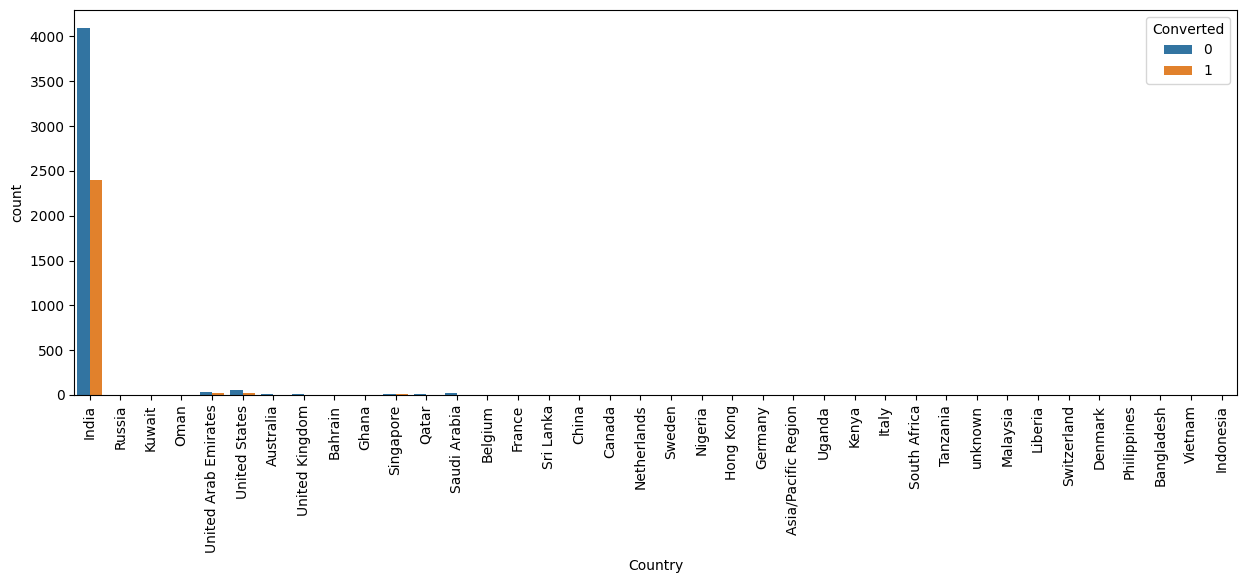

In [10]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Country', hue='Converted', data=df)
plt.xticks(rotation=90)
plt.show()

As we can see the Number of Values for India are quite high (approx 95%+ of the Data), this column can be dropped

In [11]:
#creating a list of columns to be droppped
cols_to_drop=['Country']

In [12]:
df['City'] = df['City'].replace(np.nan,'Mumbai')
df['City'] = df['City'].replace("Select",'Other Cities')

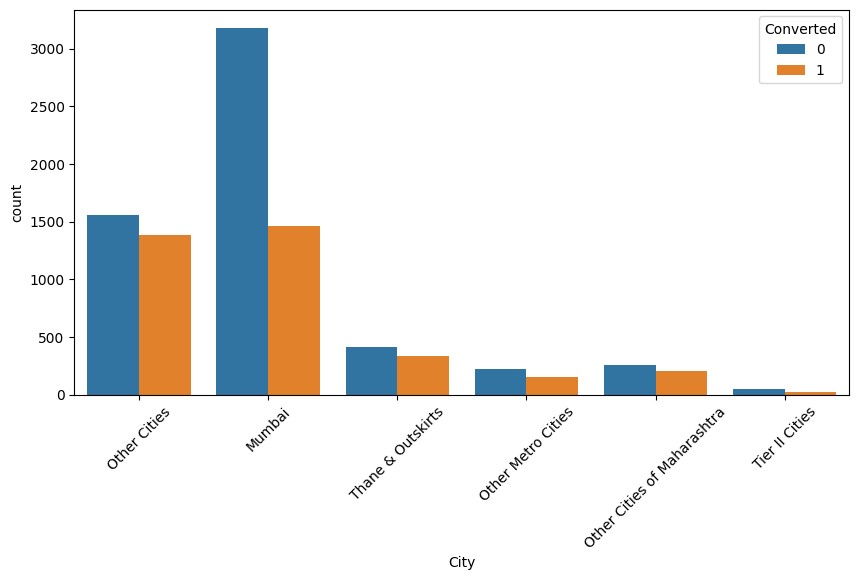

In [13]:
#plotting spread of City columnn after replacing NaN values

plt.figure(figsize=(10,5))
s1=sns.countplot(data=df,x='City', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)
plt.show()

In [14]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

Specialization
Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

There are observations like 'Select' and 'NaN', there we can consider it as maybe its not present in the list given to leads. We can then specify them as 'Not Mentioned'.

In [15]:
df['Specialization'] = df['Specialization'].replace(np.nan,'Not Mentioned')
df['Specialization'] = df['Specialization'].replace("Select",'Not Mentioned')

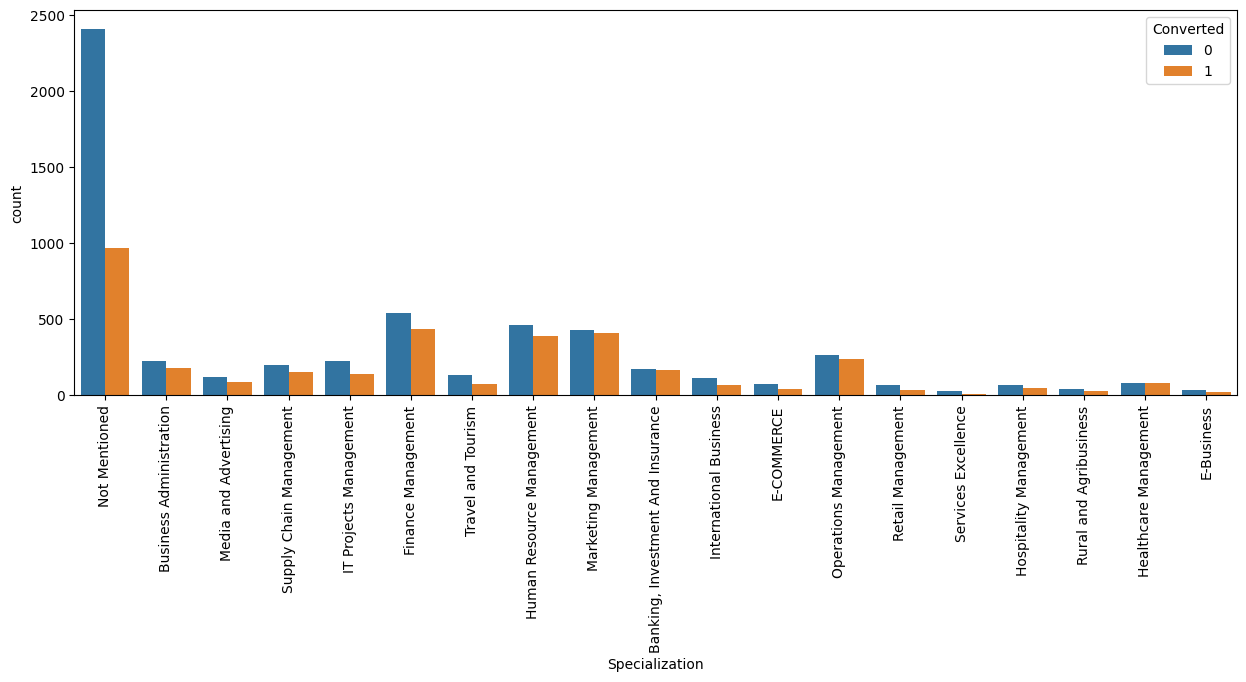

In [16]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(data=df, x='Specialization', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

We observe that specializations with a focus on management exhibit a notably higher number of generated leads, and a substantial proportion of these leads are successfully converted. Consequently, it becomes evident that this 'Specialization' variable holds significant importance and should not be considered for elimination.

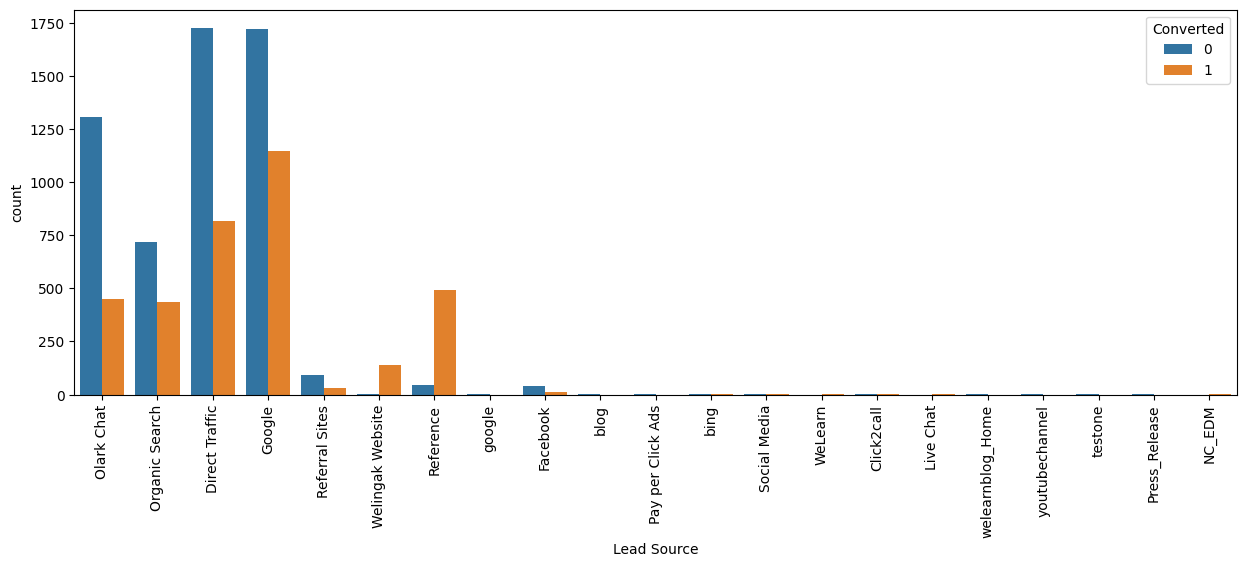

In [17]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=df, x='Lead Source', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Google and Direct traffic sources generate the highest number of leads.
- The conversion rate for reference leads and leads through the Welingak website is notably high.
- To enhance the overall lead conversion rate, prioritize improving the conversion rates for Olark chat, organic search, direct traffic, and Google leads.
- Additionally, aim to increase lead generation from reference sources and the Welingak website.

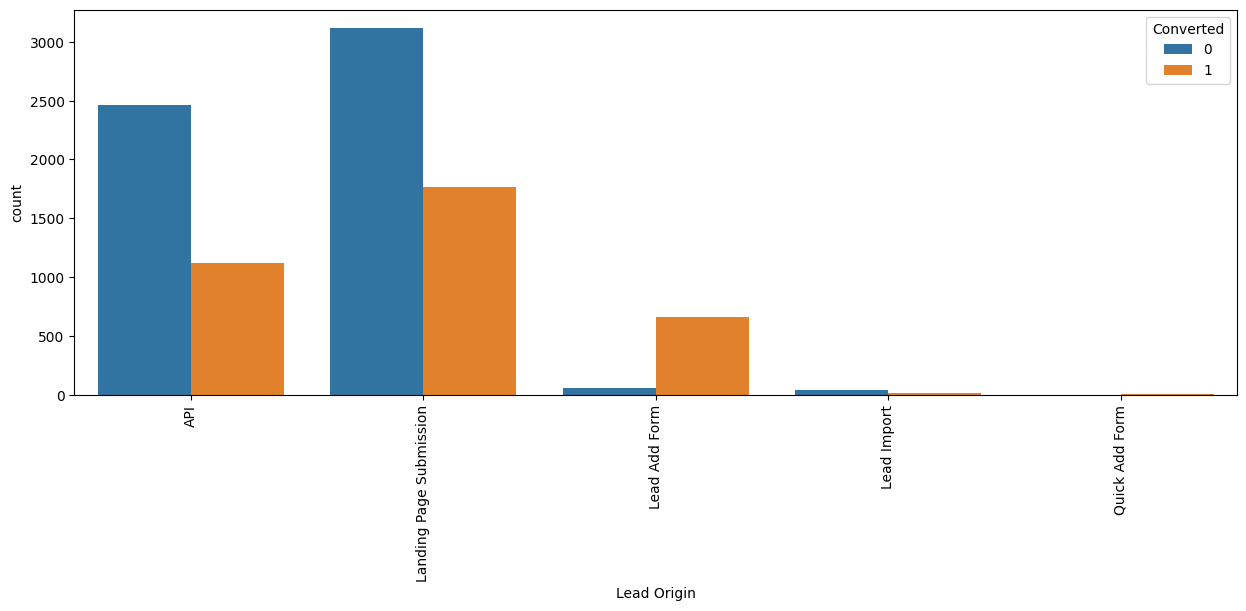

In [18]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=df, x='Lead Origin', hue='Converted')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


- API and Landing Page Submission yield a high number of leads and conversions.
- Lead Add Form has a remarkable conversion rate, even though the total lead count is not very high.
- Lead Import and Quick Add Form generate comparatively fewer leads.
- To enhance the overall lead conversion rate, focus on improving the conversion of leads from API and Landing Page Submission sources.
- Prioritize efforts to generate more leads through the Lead Add Form.

In [19]:
df['Last Activity'].value_counts(dropna=False)


Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

'NaN','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails', 'Visited Booth in Tradeshow', these values for Last Activity and Last Notable Activity can be changed to 'Others', as they can be considered a false lead.

In [20]:
#replacing Nan Values and combining low frequency values

df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked', 'Email Marked Spam',                  
'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

In [21]:
df['Last Notable Activity'] = df['Last Notable Activity'].replace(np.nan,'Others')
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation', 'Approached upfront','View in browser link Clicked', 'Email Marked Spam',                  
'Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Others')

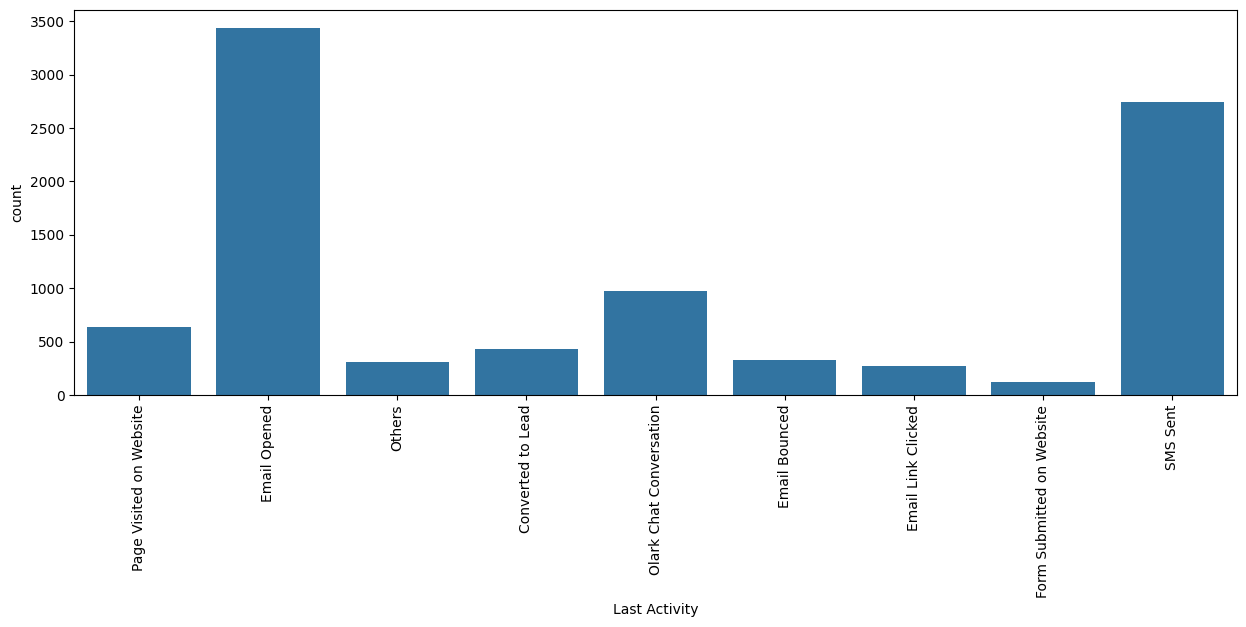

In [22]:
plt.figure(figsize=(15,5))
s1=sns.countplot(data=df, x='Last Activity')
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- Email Opened and SMS sent are 2 most activity seen by the leads. 

In [23]:
#checking value counts for Do Not Email
print(df['Do Not Email'].value_counts(dropna=False))
#checking value counts for Do Not call
df['Do Not Call'].value_counts(dropna=False)

Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


Do Not Call
No     9238
Yes       2
Name: count, dtype: int64

In [24]:
print(df['X Education Forums'].value_counts(dropna=False))
df['Newspaper'].value_counts(dropna=False)

X Education Forums
No     9239
Yes       1
Name: count, dtype: int64


Newspaper
No     9239
Yes       1
Name: count, dtype: int64

In [25]:
print(df.Search.value_counts(dropna=False))
df['Newspaper Article'].value_counts(dropna=False)

Search
No     9226
Yes      14
Name: count, dtype: int64


Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64

In [26]:
df.Magazine.value_counts(dropna=False)

Magazine
No    9240
Name: count, dtype: int64

In [27]:
print(df['Digital Advertisement'].value_counts(dropna=False))
print(df['Through Recommendations'].value_counts(dropna=False))
print(df['Receive More Updates About Our Courses'].value_counts(dropna=False))
print(df['Update me on Supply Chain Content'].value_counts(dropna=False))
print(df['Get updates on DM Content'].value_counts(dropna=False))
print(df['I agree to pay the amount through cheque'].value_counts(dropna=False))
print(df['A free copy of Mastering The Interview'].value_counts(dropna=False))

Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
Get updates on DM Content
No    9240
Name: count, dtype: int64
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
A free copy of Mastering The Interview
No     6352
Yes    2888
Name: count, dtype: int64


As we can observe there is huge imbalance between data for the following columns - 'Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'. 
So we are going to drop the columns mentioned above.

In [28]:
# List of columns to be dropped
columns_to_drop = ['Do Not Email','Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [29]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Not Mentioned,Select,Unemployed,Better Career Prospects,Interested in other courses,Select,Other Cities,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Not Mentioned,Select,Unemployed,Better Career Prospects,Ringing,Select,Other Cities,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,Ringing,Select,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Not Mentioned,Other,Unemployed,Better Career Prospects,Will revert after reading the email,Select,Mumbai,No,Modified


In [30]:
df.shape

(9240, 19)

In [31]:
df[["Last Notable Activity","Last Activity"]].head(20)

,Last Notable Activity,Last Activity
0,Modified,Page Visited on Website
1,Email Opened,Email Opened
2,Email Opened,Email Opened
3,Modified,Others
4,Modified,Converted to Lead
5,Modified,Olark Chat Conversation
6,Modified,Email Opened
7,Modified,Olark Chat Conversation
8,Email Opened,Email Opened
9,Email Opened,Email Opened


In [32]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                          26.63
Specialization                                    0.00
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                              0.00
A free copy of Mastering The Interview            0.00
Last Notab

In [33]:
# Doing Null value treatment for remaining columns
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')
df['Country']=df['Country'].replace(np.nan,df.Country.mode)

In [34]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [35]:
df[['How did you hear about X Education','What matters most to you in choosing a course','Lead Profile']].head(20)

,How did you hear about X Education,What matters most to you in choosing a course,Lead Profile
0,Select,Better Career Prospects,Select
1,Select,Better Career Prospects,Select
2,Select,Better Career Prospects,Potential Lead
3,Word Of Mouth,Better Career Prospects,Select
4,Other,Better Career Prospects,Select
5,NaN,NaN,NaN
6,Online Search,Better Career Prospects,Potential Lead
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,Word Of Mouth,NaN,NaN


In [36]:
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace('Select', 'Others')
df['How did you hear about X Education'] = df['How did you hear about X Education'].replace(np.nan, 'Others')

In [37]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace('Select', 'Others')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Others')

In [38]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace('Select', 'Others')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Others')

In [39]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                    0.00
How did you hear about X Education                0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Tags                                              0.00
Lead Profile                                     29.32
City                                              0.00
A free copy of Mastering The Interview            0.00
Last Notab

In [40]:
cols=list(df.columns)

In [41]:
# columns avaiable 
cols

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

# Numerical Attributes Analysis and Null value treatment

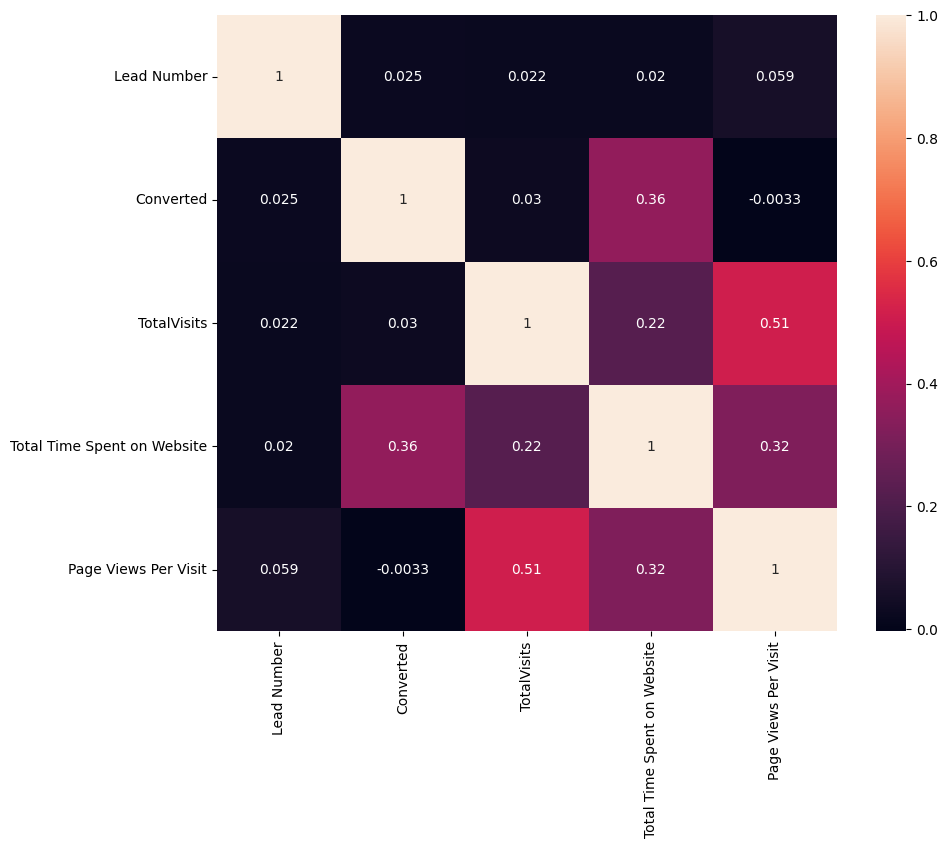

In [42]:
numeric_df = df.select_dtypes(include=['number'])  # Select numeric columns
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


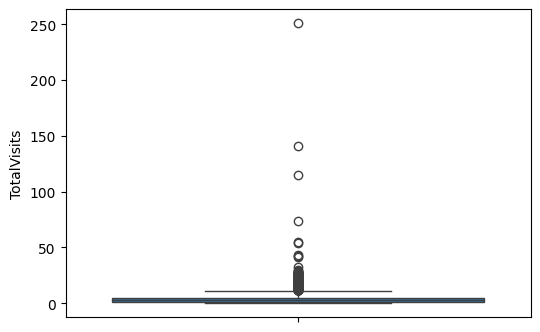

In [43]:
#Total Visits
#visualizing spread of variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

In [44]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[.25, .5, .75, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

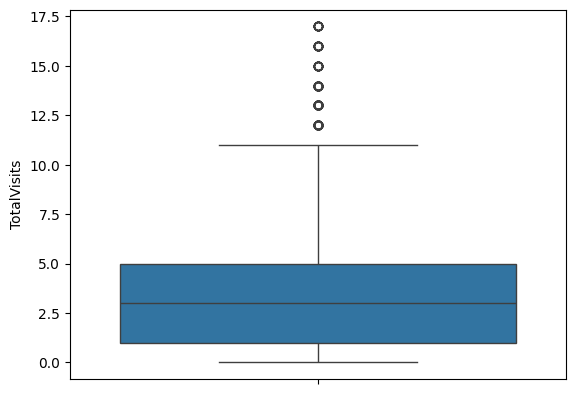

In [45]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = df.TotalVisits.quantile(0.99)
df = df[(df.TotalVisits <= Q3)]
Q1 = df.TotalVisits.quantile(0.01)
df = df[(df.TotalVisits >= Q1)]
sns.boxplot(y=df['TotalVisits'])
plt.show()

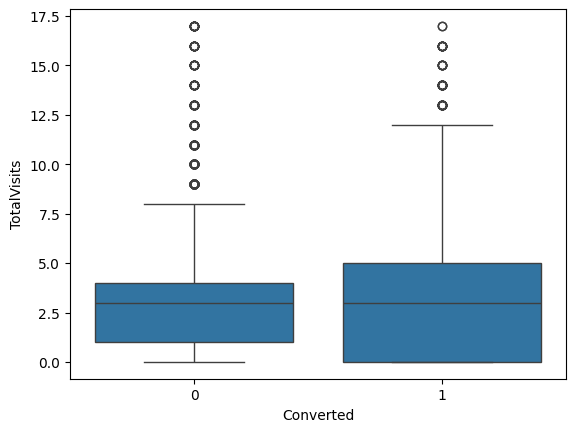

In [46]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

In [47]:
df['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

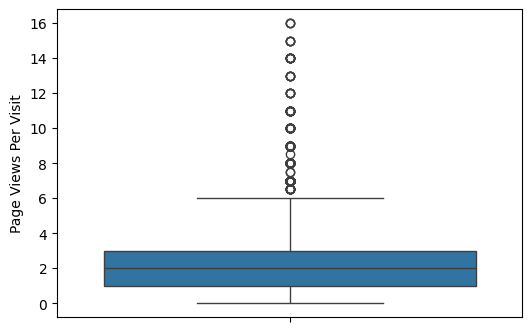

In [48]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

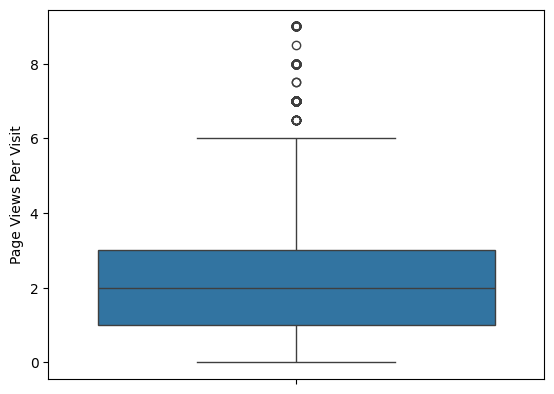

In [49]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df[df['Page Views Per Visit'] <= Q3]
Q1 = df['Page Views Per Visit'].quantile(0.01)
df = df[df['Page Views Per Visit'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

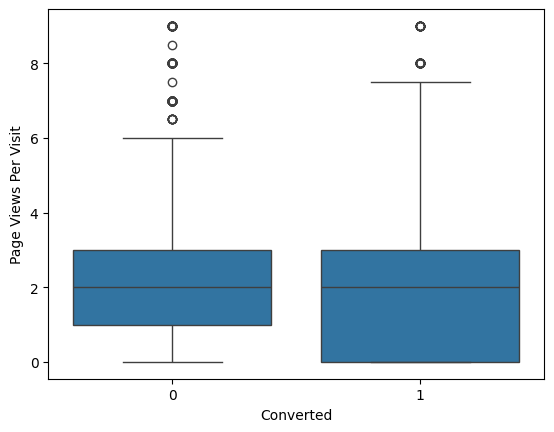

In [50]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Page Views Per Visit'])
plt.show()

In [51]:
df['Total Time Spent on Website'].describe()

count    8953.000000
mean      477.736401
std       544.180321
min         0.000000
25%         5.000000
50%       240.000000
75%       911.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

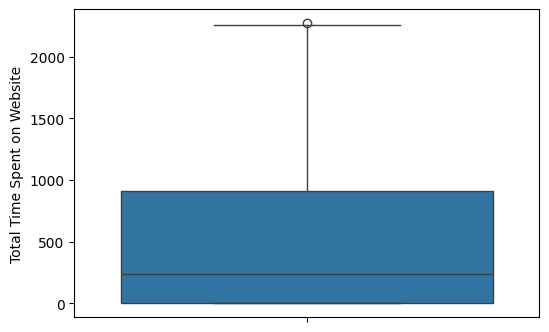

In [52]:
#Total Visits
#visualizing spread of variable
plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

<Axes: ylabel='Page Views Per Visit'>

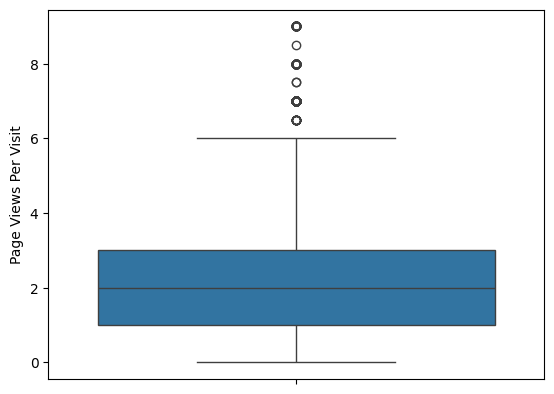

In [53]:
Q3 = df['Total Time Spent on Website'].quantile(0.99)
df = df[df['Total Time Spent on Website'] <= Q3]
Q1 = df['Total Time Spent on Website'].quantile(0.01)
df = df[df['Total Time Spent on Website'] >= Q1]
sns.boxplot(y=df['Page Views Per Visit'])

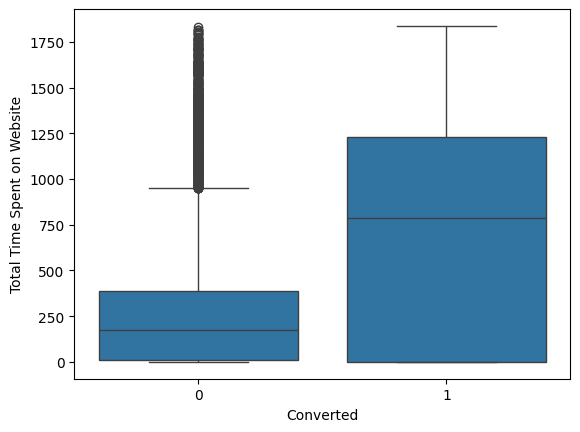

In [54]:
sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

- Leads who invest more time on the website exhibit a higher likelihood of conversion.
- Enhancing website engagement can encourage leads to spend more time, increasing the probability of conversion.

Dropping 'Lead Profile'

In [55]:
df.drop(columns='Lead Profile', inplace=True)

In [56]:
#checking missing values in leftover columns/

round(100*(df.isnull().sum()/len(df.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.33
Converted                                        0.00
TotalVisits                                      0.00
Total Time Spent on Website                      0.00
Page Views Per Visit                             0.00
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
City                                             0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

##### Note
Dropping 'Prospect ID' and 'Lead Number' as they display uniqueness of the data, they will not contribute for classification of data.Also as we saw above maximum leads are from India so it wont contribute in classfication model building so dropping that too

In [57]:
df.drop(columns=['Country','Prospect ID','Lead Number'], inplace=True)

In [58]:
df.shape

(8863, 15)

# Dummy Variable

In [59]:
cat_col= df.select_dtypes(include=['object']).columns
cat_col

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [60]:
dummy = pd.get_dummies(df[['Lead Origin','What is your current occupation','City','A free copy of Mastering The Interview']], drop_first=True)
df=pd.concat([df, dummy], axis = 1)

In [61]:
dummy = pd.get_dummies(df['Specialization'], prefix='Specialization')
dummy = dummy.drop(columns=['Specialization_Not Mentioned'], axis=1)
df=pd.concat([df, dummy], axis = 1)

In [64]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source', drop_first=True)
leads = pd.concat([df, dummy], axis = 1)

In [65]:
dummy = pd.get_dummies(df['Last Activity'], prefix='Last Activity', drop_first=True)
dummy = dummy.drop(columns=['Last Activity_Others'], axis=1)
df=pd.concat([df, dummy], axis = 1)

In [69]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity', drop_first=True)
df = pd.concat([df, dummy], axis = 1)

In [70]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(columns=['Tags_Not Specified'], axis=1)
df = pd.concat([df, dummy], axis = 1)

In [71]:
dummy = pd.get_dummies(df['How did you hear about X Education'], prefix='How did you hear about X Education')
dummy = dummy.drop(columns=['How did you hear about X Education_Others'], axis=1)
df=pd.concat([df, dummy], axis = 1)

In [73]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix='Last Notable Activity')
dummy = dummy.drop(columns=['Last Notable Activity_Others'], axis=1)
df=pd.concat([df, dummy], axis = 1)

In [74]:
dummy = pd.get_dummies(df['What matters most to you in choosing a course'], prefix='What matters most to you in choosing a course')
dummy = dummy.drop(columns=['What matters most to you in choosing a course_Other'], axis=1)
df=pd.concat([df, dummy], axis = 1)

In [76]:
df.shape

(8863, 108)